In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = '/home/rus/Desktop/Perception/Project_Sensors_Fusion/drone_traj/drone_traj/'
mocap = pd.read_csv(path+'_slash_vicon_slash_waredrone_slash_waredrone.csv')
imu = pd.read_csv(path+'_slash_imu_slash_data.csv')

In [5]:
mocap.head()

,rosbagTimestamp,header,seq,stamp,secs,nsecs,frame_id,child_frame_id,transform,translation,x,y,z,rotation,x.1,y.1,z.1,w
0,1545224250918270763,NaN,164064,NaN,1545224250,898109118,"""/world""","""vicon/waredrone/waredrone""",NaN,NaN,0.238554,-0.277686,0.349137,NaN,0.008631,-0.008827,-0.687622,0.725964
1,1545224250931006648,NaN,164065,NaN,1545224250,908270079,"""/world""","""vicon/waredrone/waredrone""",NaN,NaN,0.238560,-0.277689,0.349169,NaN,0.008620,-0.008858,-0.687624,0.725962
2,1545224250937436250,NaN,164066,NaN,1545224250,917922404,"""/world""","""vicon/waredrone/waredrone""",NaN,NaN,0.238570,-0.277679,0.349158,NaN,0.008637,-0.008863,-0.687612,0.725973
3,1545224250950658489,NaN,164067,NaN,1545224250,928664420,"""/world""","""vicon/waredrone/waredrone""",NaN,NaN,0.238575,-0.277677,0.349145,NaN,0.008670,-0.008872,-0.687617,0.725967
4,1545224250957771685,NaN,164068,NaN,1545224250,938379292,"""/world""","""vicon/waredrone/waredrone""",NaN,NaN,0.238568,-0.277659,0.349114,NaN,0.008649,-0.008839,-0.687620,0.725966


In [6]:
### mocap data
mts = np.array(mocap.secs)
mts = mts + np.array(mocap.nsecs/10e8)
mts = mts - mts[0]

mx = np.array(mocap.x)
mx = mx - mx[0]
my = np.array(mocap.y)
my = my - my[0]
mz = np.array(mocap.z)
mz = mz - mz[0]

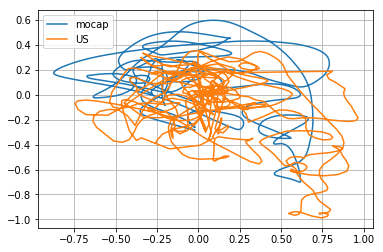

In [49]:
log_data  = open('drone_traj/2018_12_19__1549__hedgehogs.log', 'r')
hedge_time = []
hedge_numbers = []
pose_drone = np.array([None, None, None])

l = 0
for line in log_data:
    l += 1
    thing = line.split(',')
    if l>1: # skip 1st line
        number = int(thing[3])
        hedge_numbers.append(number)
        if number == 4:
            pose4 = np.array([float(thing[4]),float(thing[5]),float(thing[6])])
        elif number == 6:
            pose6 = np.array([float(thing[4]),float(thing[5]),float(thing[6])])
        elif number == 9:
            pose9 = np.array([float(thing[4]),float(thing[5]),float(thing[6])])
        elif number == 5:
            pose_drone = np.vstack( (pose_drone, np.array([float(thing[4]),float(thing[5]),float(thing[6])]) ))
            t = int(thing[0])
            hedge_time.append(t)
pose_drone = pose_drone[1:,:]
            
hx_m = pose_drone[:,0]
hy_m = pose_drone[:,1]

### hedge data
hts = np.array(hedge_time)/1000
hts = hts - hts[0]
hts = hts * mts[-1]/hts[-1]
hx = np.array(-hx_m)
hy = np.array(-hy_m)
# matching of mocap and hedge starts of trajectory
hx = hx - hx[0]
hy = hy - hy[0]

plt.plot(mx, my, label='mocap')
plt.plot(hx, hy, label='US')
plt.grid()
plt.legend()     
plt.show()

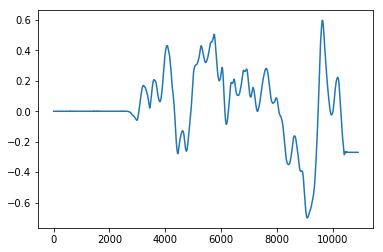

In [43]:
plt.plot(my)

In [50]:
hts[0], hts[-1], mts[0], mts[-1]

(0.0, 109.08978223800659, 0.0, 109.08978223800659)

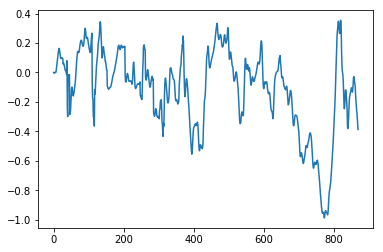

In [53]:
plt.plot(hy)